In [ ]:
import pandas_datareader as pdr
key="95e463600dac329bb00a1830ae4051fff3d095c7"

In [ ]:
df = pdr.get_data_tiingo('SSNLF', api_key=key)

In [ ]:
df.to_csv('SSNLF.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('SSNLF.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,SSNLF,2016-08-29 00:00:00+00:00,1220.0,1220.0,1220.0,1220.0,10,23.534291,23.534291,23.534291,23.534291,500,0.0,1.0
1,SSNLF,2016-08-30 00:00:00+00:00,1250.0,1250.0,1250.0,1250.0,27,24.113003,24.113003,24.113003,24.113003,1350,0.0,1.0
2,SSNLF,2016-08-31 00:00:00+00:00,1250.0,1250.0,1250.0,1250.0,0,24.113003,24.113003,24.113003,24.113003,0,0.0,1.0
3,SSNLF,2016-09-01 00:00:00+00:00,1250.0,1250.0,1250.0,1250.0,15,24.113003,24.113003,24.113003,24.113003,750,0.0,1.0
4,SSNLF,2016-09-02 00:00:00+00:00,1250.0,1250.0,1250.0,1250.0,30,24.113003,24.113003,24.113003,24.113003,1500,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1003,SSNLF,2021-08-23 00:00:00+00:00,44.2,44.2,44.2,44.2,0,44.2,44.2,44.2,44.2,0,0.0,1.0
1004,SSNLF,2021-08-24 00:00:00+00:00,44.2,44.2,44.2,44.2,0,44.2,44.2,44.2,44.2,0,0.0,1.0
1005,SSNLF,2021-08-25 00:00:00+00:00,44.2,44.2,44.2,44.2,0,44.2,44.2,44.2,44.2,0,0.0,1.0
1006,SSNLF,2021-08-26 00:00:00+00:00,44.2,44.2,44.2,44.2,0,44.2,44.2,44.2,44.2,0,0.0,1.0
1007,SSNLF,2021-08-27 00:00:00+00:00,44.2,44.2,44.2,44.2,0,44.2,44.2,44.2,44.2,0,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0       1220.0
1       1250.0
2       1250.0
3       1250.0
4       1250.0
         ...  
1003      44.2
1004      44.2
1005      44.2
1006      44.2
1007      44.2
Name: close, Length: 1008, dtype: float64

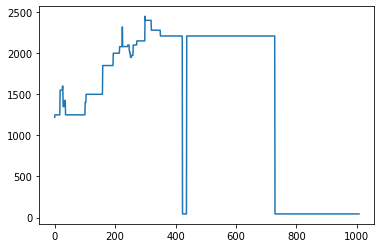

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
df1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.48873556]
 [0.50120542]
 [0.50120542]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(655, 353)

In [ ]:
train_data

In [ ]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]  ###i=0,1,2,3,-------,99
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3, and Y=t+4
time_step = 100 
X_train, Y_train = create_dataset(train_data, time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [ ]:
print(X_train.shape),print(Y_train.shape)

(554, 100)
(554,)


(None, None)

In [ ]:
print(X_test.shape),print(Y_test.shape)

(252, 100)
(252,)


(None, None)

In [ ]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
### Create the Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 8s 337ms/step - loss: 0.2947 - val_loss: 0.0430
Epoch 2/100
9/9 [==============================] - 2s 196ms/step - loss: 0.0455 - val_loss: 0.0262
Epoch 3/100
9/9 [==============================] - 2s 196ms/step - loss: 0.0304 - val_loss: 0.0599
Epoch 4/100
9/9 [==============================] - 2s 199ms/step - loss: 0.0228 - val_loss: 0.0448
Epoch 5/100
9/9 [==============================] - 2s 194ms/step - loss: 0.0214 - val_loss: 0.0604
Epoch 6/100
9/9 [==============================] - 2s 199ms/step - loss: 0.0204 - val_loss: 0.0521
Epoch 7/100
9/9 [==============================] - 2s 200ms/step - loss: 0.0200 - val_loss: 0.0571
Epoch 8/100
9/9 [==============================] - 2s 197ms/step - loss: 0.0198 - val_loss: 0.0557
Epoch 9/100
9/9 [==============================] - 2s 198ms/step - loss: 0.0195 - val_loss: 0.0540
Epoch 10/100
9/9 [==============================] - 2s 201ms/step - loss: 0.0192 - val_loss: 0.0547
Epoch 11/

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
### Prediction and check performence metrices
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
###Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE  performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

2051.1879693911683

In [ ]:
###Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

355.6136746031336

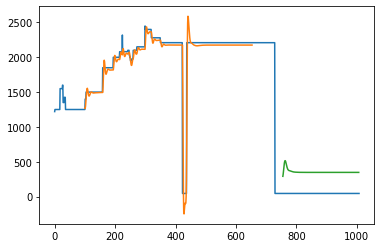

In [ ]:
###Plotting
# Shift train predictions for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1: len(df1)-1, :]=test_predict
#plot baseline and predicitons 
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

353

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 12)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
### demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=12
i=0
while(i<30):
  if(len(temp_input)>12):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    ###print(x_input)
    yhat=model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
      x_input=x_input.reshape((1,n_steps,1))
      yhat=model.predict(x_input,verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i=i+1

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(df1)

1008

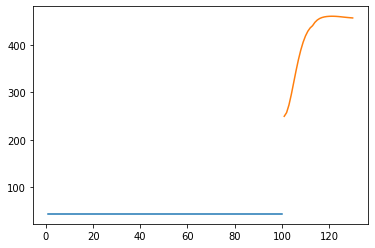

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[908:]))

plt.plot(day_pred,scaler.inverse_transform(lst_output))

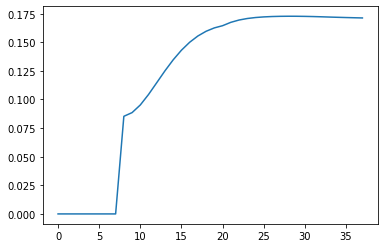

In [ ]:
df2=df1.tolist()
df2.extend(lst_output)
plt.plot(df2[1000:])

In [ ]:
df2=scaler.inverse_transform(df2).tolist()

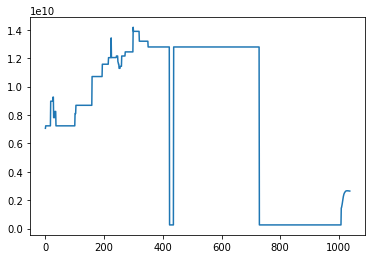

In [ ]:
plt.plot(df2)